# 이웃집 토토치 파이토치 : Day 1

📢 해당 게시물은 파이토치 공식 튜토리얼 중 파이토치(PyTorch) 시작하기를 읽고 직접 작성해보는 실습 노트북입니다.

#### 목차
1. 탠서(TENSOR)
    1. 텐서(tensor) 초기화
    2. 텐서의 속성(Attribute)
    3. 텐서 연산(Operation)
    4. NumPy 변환(Bridge)
2. Autograd
    1. 간단한 이미지 분류 학습
    2. [실습] 연산 그래프 직접 구현하기
3. DATASET과 DATALOADER
    1. 데이터셋 불러오기
    2. 데이터셋을 순회하고 시각화하기
    3. 파일에서 사용자 정의 데이터셋 만들기
    4. DataLoader로 학습용 데이터 준비하기
    5. DataLoader를 통해 순회하기

## 1. 텐서 (Tensor)

In [1]:
import torch
import numpy as np

### 텐서(tensor) 초기화

**데이터로부터 직접(directly) 생성하기**

In [2]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

**NumPy 배열로부터 생성하기**

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

**다른 텐서로부터 생성하기**

In [4]:
# x_data의 속성을 유지합니다.
x_ones = torch.ones_like(x_data) 
print(f"Ones Tensor: \n {x_ones} \n")

# x_data의 속성을 덮어씁니다.
x_rand = torch.rand_like(x_data, dtype=torch.float) 
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.7417, 0.3019],
        [0.1633, 0.9932]]) 



**무작위(random) 또는 상수(constant) 값을 사용하기:**

In [5]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.6258, 0.8072, 0.5944],
        [0.7807, 0.7263, 0.5444]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [6]:
# add_ 메소드는 결과를 변수에 저장한다

rand_tensor.add(ones_tensor)
print(rand_tensor)
rand_tensor.add_(ones_tensor)
print(rand_tensor)

tensor([[0.6258, 0.8072, 0.5944],
        [0.7807, 0.7263, 0.5444]])
tensor([[1.6258, 1.8072, 1.5944],
        [1.7807, 1.7263, 1.5444]])


### 텐서의 속성(Attribute)

In [8]:
tensor = torch.rand(3,4)

############################
# 밑줄 친 곳을 채워주세요! #
############################

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### 텐서 연산(Operation)

<div class="alert alert-warning">
    <p><b>Q. 텐서를 사용하면 어떤 점이 좋을까요??</b></p>
    <p>👉 (여기에 답을 입력해 주세요)</p>
</div>

In [9]:
# GPU가 존재하면 텐서를 이동합니다
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

NumPy식의 표준 인덱싱과 슬라이싱:

In [10]:
data = [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]
t_data = torch.tensor(data)

############################
# 밑줄 친 곳을 채워주세요! #
############################

print('2번째 행 출력: ', t_data[1])
print('t_data에서 5를 출력: ', t_data[1][1])
print('마지막 column 출력:', t_data[:,-1])
t_data[:, -1] = 0
print('3번째 column을 0으로 만들기:')
print(t_data)

2번째 행 출력:  tensor([4, 5, 6])
t_data에서 5를 출력:  tensor(5)
마지막 column 출력: tensor([3, 6, 9])
3번째 column을 0으로 만들기:
tensor([[1, 2, 0],
        [4, 5, 0],
        [7, 8, 0]])


**텐서 합치기**

In [11]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[0.3700, 0.5485, 0.6548, 0.9194, 0.3700, 0.5485, 0.6548, 0.9194, 0.3700,
         0.5485, 0.6548, 0.9194],
        [0.1506, 0.0910, 0.6198, 0.2775, 0.1506, 0.0910, 0.6198, 0.2775, 0.1506,
         0.0910, 0.6198, 0.2775],
        [0.8948, 0.3805, 0.1971, 0.6873, 0.8948, 0.3805, 0.1971, 0.6873, 0.8948,
         0.3805, 0.1971, 0.6873]])


**산술 연산(Arithmetic operations)**

In [12]:
tensor = torch.rand(3,4)

In [13]:
# 두 텐서 간의 행렬 곱(matrix multiplication)을 계산합니다. y1, y2, y3은 모두 같은 값을 갖습니다.
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)  # 결과를 y3 변수에 저장
print(y1)
print(y2)
print(y3)

print('-- '*15)
# 요소별 곱(element-wise product)을 계산합니다. z1, z2, z3는 모두 같은 값을 갖습니다.
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)
print(z1)
print(z2)
print(z3)

tensor([[1.0555, 0.6451, 1.0353],
        [0.6451, 0.5302, 0.6017],
        [1.0353, 0.6017, 1.8267]])
tensor([[1.0555, 0.6451, 1.0353],
        [0.6451, 0.5302, 0.6017],
        [1.0353, 0.6017, 1.8267]])
tensor([[1.0555, 0.6451, 1.0353],
        [0.6451, 0.5302, 0.6017],
        [1.0353, 0.6017, 1.8267]])
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
tensor([[0.1141, 0.0022, 0.1584, 0.7808],
        [0.0008, 0.0072, 0.3052, 0.2170],
        [0.4339, 0.7573, 0.0889, 0.5466]])
tensor([[0.1141, 0.0022, 0.1584, 0.7808],
        [0.0008, 0.0072, 0.3052, 0.2170],
        [0.4339, 0.7573, 0.0889, 0.5466]])
tensor([[0.1141, 0.0022, 0.1584, 0.7808],
        [0.0008, 0.0072, 0.3052, 0.2170],
        [0.4339, 0.7573, 0.0889, 0.5466]])


<div class="alert alert-warning">
    <p><b>Q. 행렬 곱(matrix multiplication)과 요소별 곱(element-wise product)의 차이점이 뭘까요??</b></p>
    <p>👉 (여기에 답을 입력해 주세요)</p>
</div>

**단일-요소(single-element)**

In [14]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

5.364258766174316 <class 'float'>


**텐서차원 축소/확장(Squeeze/Unsqueeze) 연산**

In [15]:
# Squeeze/Unsqueeze
x = torch.rand((1,1,3,4))
y = x.squeeze()
print(y.size())
print(y.unsqueeze(1).size())

torch.Size([3, 4])
torch.Size([3, 1, 4])


<div class="alert alert-warning">
    <p><b>Q. Squeeze와 Unsqueeze는 어떤 경우에 사용 될까요? 자유롭게 생각해보죠!</b></p>
    <p>👉 (여기에 답을 입력해 주세요)</p>
</div>

**스태킹(Stacking)**

In [16]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


### 넘파이(Numpy)

**텐서를 NumPy 배열로 변환하기**

In [17]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


텐서의 변경 사항이 NumPy 배열에 반영됩니다.

In [18]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


**NumPy 배열을 텐서로 변환하기**

In [19]:
n = np.ones(5)
t = torch.from_numpy(n)

NumPy 배열의 변경 사항이 텐서에 반영됩니다.

In [20]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# 2. Autograd

## 간단 이미지 분류 모델 학습

In [21]:
random_seed = 99
torch.manual_seed(random_seed)

동일한 출력을 얻기 위해서 random seed 값 설정

### 1) 데이터 준비하기

In [22]:
model = torch.nn.Sequential(
    torch.nn.Linear(6, 1),
    torch.nn.Flatten()
)
data = torch.rand(2, 6)
labels = torch.ones(2, 1)
labels

tensor([[1.],
        [1.]])

랜덤으로 설정된 label 값은 ([1.], [1.])입니다.

<div class="alert alert-warning">
    <p><b>Q. 각자 그림을 그리면서 이해하시는 것을 추천드립니다!</b></p>
    <p>👉 (해답은 토론 시간에 공유해볼게요))</p>
</div>

### 2) 순전파 (Forward Propagation)

In [23]:
prediction = model(data) # 순전파 단계(forward pass)
prediction

tensor([[0.3425],
        [0.2512]], grad_fn=<AddmmBackward>)

순전파 단계에서는 입력(input) 데이터를 모델의 각 층(layer)에 통과시켜 예측값(prediction)을 생성합니다.   
모델의 output으로 나온 pred 값은 ([0.3425], [0.2512])입니다.

In [24]:
layer = model[0]
print(f'Result: y = {layer.bias.item()} + {layer.weight[:, 0].item()} x + {layer.weight[:, 1].item()} x^2 + {layer.weight[:, 2].item()} x^3')

Result: y = -0.36719897389411926 + -0.32389628887176514 x + 0.38388070464134216 x^2 + 0.36584773659706116 x^3


모델의 초기 weight와 bias를 확인 해보시길 바랍니다.  
손실함수와 옵티마이저를 사용해서 이 값들을 변경할 것입니다.

### 3) 손실함수 (loss) 계산하기

In [25]:
loss = (prediction - labels).sum() 
print(loss)
loss.backward() # 역전파 단계(backward pass)

tensor(-1.4063, grad_fn=<SumBackward0>)


- 모델의 예측값(prediction)과 그에 해당하는 정답(label)의 차이를 합하여 오차(error, 손실(loss) )를 계산하였습니다. 손실함수를 구하는 방법은 다양하지만 이번글에서는 간단하게 차이값으로만 구하도록 하겠습니다.

-  오차 텐서(error tensor)에 .backward() 를 호출하면 역전파가 시작되며, 그 다음 Autograd가 매개변수(parameter)의 .grad 속성(attribute)에, 모델의 각 매개변수에 대한 변화도(gradient)를 계산하고 저장합니다.

<div class="alert alert-warning">
    <p><b>Q. loss의 결과는 -1.4063이 나왔습니다, 직접 labels 값과 pred 값을 비교해서 계산해봅시다!</b></p>
    <p>👉 (해답은 토론 시간에 공유해볼게요))</p>
</div>

### 4) 옵티마이저 설정

In [26]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

- 학습율(learning rate) 0.01과 모멘텀(momentum) 0.9를 갖는 SGD로 옵티마이즈를 설정하였으며, 옵티마이저(optimizer)에 모델의 모든 매개변수(models.parameters())를 등록합니다.

### 5) 경사하강법

In [27]:
optim.step() # 경사하강법(gradient descent)

- step 을 호출하여 경사하강법(gradient descent)을 시작합니다. 옵티마이저는 .grad 에 저장된 기울기(gradient)에 따라 각 매개변수를 조정(adjust)합니다.

In [28]:
layer = model[0]
print(f'Result: y = {layer.bias.item()} + {layer.weight[:, 0].item()} x + {layer.weight[:, 1].item()} x^2 + {layer.weight[:, 2].item()} x^3')

Result: y = -0.3871989846229553 + -0.3374588191509247 x + 0.36573174595832825 x^2 + 0.3557245135307312 x^3


In [29]:
prediction = model(data) # 순전파 단계(forward pass)
prediction

tensor([[0.2804],
        [0.1692]], grad_fn=<AddmmBackward>)

## 실습 문제
다음과 같은 연산 그래프를 직접 구현하면서 Autograd를 이해해보는 시간을 갖겠습니다.   
이번 실습에서는 backpop의 미분 값이 어떻게 계산되는 지 살펴볼 것입니다.  
x는 초기 값으로 2x2의 1로 채워진 행렬을 사용할 것입니다.  

<img src="https://github.com/PEBpung/TotochTeam1/blob/main/day_1/img/ex1.jpg?raw=1" width='600'>

In [73]:
x = torch.ones(2, 2)
print(x)
print(x.requires_grad)
print('-'*10)

x = torch.ones(2, 2, requires_grad=True)
print(x)
print(x.requires_grad)

tensor([[1., 1.],
        [1., 1.]])
False
----------
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True


<div class="alert alert-warning">
    <p><b>Q. requires_grad는 어떤 역할을 하는 파라미터일까요?</b></p>
    <p>👉 (여기에 답을 입력해 주세요)</p>
</div>

In [74]:
############################
# 밑줄 친 곳을 채워주세요! #
############################
y = x + 2
print(y)
print(y.requires_grad)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
True


In [75]:
print(y.grad_fn)

In [77]:
############################
# 밑줄 친 곳을 채워주세요! #
############################

z = 3 * y ** 2
out = z.mean()
print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


### Gradient, 경사/기울기

역전파를 해보겠습니다. out.backward()과 out.backward(torch.Tensor([1.0]))은 동일하게 동작합니다.

In [78]:
out.backward() # upstream grad init: 1

In [79]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [80]:
x = torch.ones(5)  # input tensor
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)

z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)


True
False


<div class="alert alert-warning">
    <p><b>Q. requires_grad = True를 하면 무슨 일이 일어나길래, grad()를 호출하면 바로 미분값을 합산해줄까?</b></p>
    <p>👉 (여기에 답을 입력해 주세요)</p>
</div>

# 3. DATASET과 DATALOADER

데이터 샘플을 처리하는 코드는 지저분(messy)하고 유지보수가 어려울 수 있습니다. 더 나은 가독성(readability)과 모듈성(modularity)을 위해 데이터셋 코드를 모델 학습 코드로부터 분리하는 것이 이상적입니다. PyTorch는 ``torch.utils.data.DataLoader``와 ``torch.utils.data.Dataset`` 의 두 가지 데이터 기본 요소를 제공하여 미리 준비해된(pre-loaded) 데이터셋 뿐만 아니라 가지고 있는 데이터를 사용할 수 있도록 합니다.
``Dataset`` 은 샘플과 정답(label)을 저장하고, ``DataLoader`` 는 ``Dataset`` 을 샘플에 쉽게 접근할 수 있도록 순회 가능한 객체(iterable)로 감쌉니다.

PyTorch의 도메인 특화 라이브러리들은 (FashionMNIST와 같은) 다양한 미리 준비해둔(pre-loaded) 데이터셋을 제공합니다. 데이터셋은 ``torch.utils.data.Dataset`` 의 하위 클래스로 개별 데이터를 특정하는 함수가 구현되어 있습니다. 이러한 데이터셋은 모델을 만들어보고(prototype) 성능을 측정(benchmark)하는데 사용할 수 있습니다.

여기에서 데이터셋들을 찾아볼 수 있습니다:
[이미지 데이터셋](https://pytorch.org/vision/stable/datasets.html), 
[텍스트 데이터셋](https://pytorch.org/text/stable/datasets.html) 및
[오디오 데이터셋](https://pytorch.org/audio/stable/datasets.html)

### A. 데이터셋 불러오기

`TorchVision` 에서 [Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist) 데이터셋을
불러오는 예제를 살펴보겠습니다. Fashion-MNIST는 Zalando의 기사 이미지 데이터셋으로 60,000개의 학습 예제와 10,000개의 테스트 예제로 이루어져 있습니다. 각 예제는 흑백(grayscale)의 28x28 이미지와 10개 분류(class) 중 하나인 정답(label)으로 구성됩니다.

다음 매개변수들을 사용하여 [FashionMNIST 데이터셋](https://pytorch.org/vision/stable/datasets.html#fashion-mnist)을 불러옵니다:
 - ``root`` 는 학습/테스트 데이터가 저장되는 경로입니다.
 - ``train`` 은 학습용 또는 테스트용 데이터셋 여부를 지정합니다.
 - ``download=True`` 는 ``root`` 에 데이터가 없는 경우 인터넷에서 다운로드합니다.
 - ``transform`` 과 ``target_transform`` 은 특징(feature)과 정답(label) 변형(transform)을 지정합니다.


In [56]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### B. 데이터셋을 순회하고 시각화하기

Dataset 에 리스트(list)처럼 직접 접근(index)할 수 있습니다: training_data[index]. matplotlib 을 사용하여 학습 데이터의 일부를 시각화해보겠습니다.

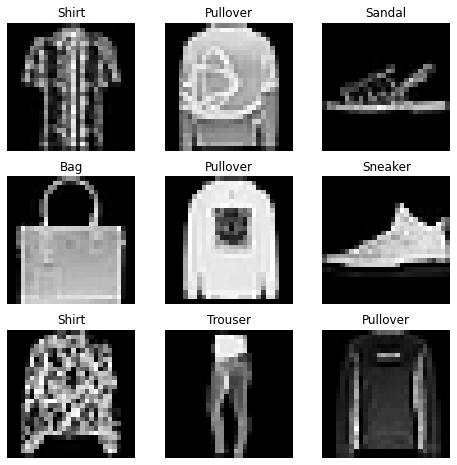

In [57]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


### C. 파일에서 사용자 정의 데이터셋 만들기

사용자 정의 Dataset 클래스는 반드시 3개 함수를 구현해야 합니다: `__init__`, `__len__`, and `__getitem__`. 아래 구현을 살펴보면 FashionMNIST 이미지들은 img_dir 디렉토리에 저장되고, 정답은 `annotations_file csv` 파일에 별도로 저장됩니다.

다음 장에서 각 함수들에서 일어나는 일들을 자세히 살펴보겠습니다

In [59]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]  # label
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

#### a. \_\_init\_\_

`__init__` 함수는 Dataset 객체가 생성(instantiate)될 때 한 번만 실행됩니다. 여기서는 이미지와 주석 파일(annotation_file)이 포함된 디렉토리와 (다음 장에서 자세히 살펴볼) 두가지 변형(transform)을 초기화합니다. 

labels.csv 파일은 다음과 같습니다: 
```
tshirt1.jpg, 0
tshirt2.jpg, 0
......
ankleboot999.jpg, 9
```

#### b. \_\_len\_\_

`__len__` 함수는 데이터셋의 샘플 개수를 반환합니다.

예:

#### c. \_\_getitem\_\_

`__getitem__` 함수는 주어진 인덱스 ``idx`` 에 해당하는 샘플을 데이터셋에서 불러오고 반환합니다.<br>
인덱스를 기반으로, 디스크에서 이미지의 위치를 식별하고, ``read_image`` 를 사용하여 이미지를 텐서로 변환하고, ``self.img_labels`` 의 csv 데이터로부터 해당하는 정답(label)을 가져오고, (해당하는 경우) 변형(transform) 함수들을 호출한 뒤, 텐서 이미지와 라벨을 Python 사전(dict)형으로 반환합니다.

In [60]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    sample = {"image": image, "label": label}
    return sample

### D. DataLoader로 학습용 데이터 준비하기

`Dataset`은 데이터셋의 특징(feature)을 가져오고 하나의 샘플에 정답(label)을 지정하는 일을 한 번에 합니다. 모델을 학습할 때, 일반적으로 샘플들을 “미니배치(minibatch)”로 전달하고, 매 에폭(epoch)마다 데이터를 다시 섞어서 과적합(overfit)을 막고, Python의 multiprocessing 을 사용하여 데이터 검색 속도를 높이려고 합니다.

`DataLoader`는 간단한 API로 이러한 복잡한 과정들을 추상화한 순회 가능한 객체(iteratable)입니다.

In [61]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f968b7ffb50>,
 <torch.utils.data.dataloader.DataLoader at 0x7f968b7ff110>)

### E. DataLoader를 통해 순회하기(iterate)

``DataLoader`` 에 데이터셋을 불러온 뒤에는 필요에 따라 데이터셋을 순회(iterate)할 수 있습니다.
아래의 각 순회(iteration)는 (각각 ``batch_size=64`` 의 특징(feature)과 정답(label)을 포함하는) ``train_features`` 와
``train_labels`` 의 묶음(batch)을 반환합니다. ``shuffle=True`` 로 지정했으므로, 모든 배치를 순회한 뒤 데이터가 섞입니다.
(데이터 불러오기 순서를 보다 세밀하게(finer-grained) 제어하려면 [Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler)
를 살펴보세요.)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


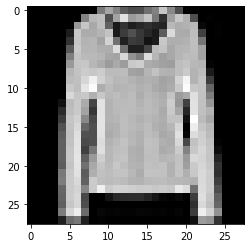

Label: 2


In [62]:
# 이미지와 정답(label)을 표시합니다.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")